![](images/gpulab.png)

# Pytorch Image Classifier Demonstration

The following GPULab demonstration uses PyTorch to create and train a flower species image classifier  using the [102 Category Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) available from Oxford's [Visual Geometry Group](https://www.robots.ox.ac.uk/~vgg/index.html). 

Import all dependencies.

In [1]:
import os
import requests
import tarfile
import scipy.io as sio
import numpy as np
import shutil
from IPython.display import Image

Set a few default values and paths.

In [2]:
data_dir = "./data/flowers/"
source_url = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/"
image_source = "102flowers.tgz"
label_source = "imagelabels.mat"
training_dir = 'training/'
validation_dir = 'validation/'
test_dir = 'test/'

## Aquire Source Data

Download data lables and if it does not exists using the [requests](https://requests.readthedocs.io/en/master/) library.

In [3]:
# create a data directory if it does not exist
if os.path.isdir(data_dir) is False:
    os.mkdir(data_dir)

# download source data if it does not exist
for file in [image_source, label_source]:
    if os.path.isfile(data_dir + file) is False:
        print(f"{data_dir + file} is not found, downloading...")
        r = requests.get(source_url + file)
        with open(data_dir + file, 'wb') as f:
            f.write(r.content)

Extract images from the downloaded [tarfile](https://docs.python.org/3/library/tarfile.html) fontaining 8,189 flower images.

In [4]:
if os.path.isfile(data_dir + "jpg/image_00001.jpg") is False:
    images_tar = tarfile.open(data_dir + image_source)
    images_tar.extractall(data_dir)
    images_tar.close()

## Sort Data

Seperate data into training, validation and test sets, reate a directory for each if they do not already exist.

In [5]:
for directory in [training_dir, validation_dir, test_dir]:
    if os.path.isdir(data_dir + directory) is False:
        os.mkdir(data_dir + directory)

This demonstration uses the [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) class from [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) to load images. Images must be organized in subdirectories naed as the category for the images it contains. 

Use [scipy.io](https://docs.scipy.org/doc/scipy/reference/io.html) to load the image labels from the downloaded MATLAB® file (.mat). Alternatively, use the GPULab Octave kernel to work directly with most MATLAB-style files. 

In [6]:
labels_mat = sio.loadmat(data_dir + "imagelabels.mat")

Ensure the lables are accessable. The label array should contain 8189 elements representing a numberic category for each of the 8,189 flower images.

In [7]:
labels = np.array(labels_mat['labels'][0])
len(labels) == 8189

True

Create a random index for sorting files using the length of the label set. Split the random index list into three groups: ~70% into a training set, ~20% into a validation set and ~10% into a test set. 

In [8]:
index_n = len(labels)
image_index = np.arange(index_n)
np.random.shuffle(image_index)

t_n = round(index_n * .70)
v_n = round(index_n * .20)

# create a dictionary of directories and a range of label indexes
idx_dict = {
    training_dir: image_index[0:t_n],
    validation_dir: image_index[t_n:t_n+v_n],
    test_dir: image_index[t_n+v_n:],
}

# ensure the indexes add up to the total numer of lables
(len(idx_dict[training_dir])
 + len(idx_dict[validation_dir])
 + len(idx_dict[test_dir])) == index_n

True

Move files to their proper folders.

`labels` holds the category value of image number (starting at 1) to its index number - 1 (zero based index)  

In [9]:
for d in idx_dict:
    for idx in idx_dict[d]:
        file_name = f"image_{idx+1:05d}.jpg"
        source_file = f"{data_dir}jpg/{file_name}"
        dest_dir = f"{data_dir}{d}{labels[idx]}"
        dest_file = f"{dest_dir}/{file_name}"
        # print(f"{source_file} -> {dest_file}")
        if os.path.isdir(dest_dir) is False:
            os.mkdir(dest_dir)
        if os.path.isfile(dest_file) is False:
            shutil.move(source_file, dest_file)

## Review Labels


In [10]:
text_labels = ["pink primrose","hard-leaved pocket orchid",
               "canterbury bells","sweet pea","english marigold",
               "tiger lily","moon orchid","bird of paradise","monkshood",
               "globe thistle","snapdragon","colt's foot","king protea",
               "spear thistle","yellow iris","globe-flower","purple coneflower",
               "peruvian lily","balloon flower","giant white arum lily",
               "fire lily","pincushion flower","fritillary","red ginger",
               "grape hyacinth","corn poppy","prince of wales feathers",
               "stemless gentian","artichoke","sweet william","carnation",
               "garden phlox","love in the mist","mexican aster","alpine sea holly",
               "ruby-lipped cattleya","cape flower","great masterwort","siam tulip",
               "lenten rose","barbeton daisy","daffodil","sword lily","poinsettia",
               "bolero deep blue","wallflower","marigold","buttercup","oxeye daisy",
               "common dandelion","petunia","wild pansy","primula","sunflower",
               "pelargonium","bishop of llandaff","gaura","geranium","orange dahlia",
               "pink-yellow dahlia","cautleya spicata","japanese anemone",
               "black-eyed susan","silverbush","californian poppy","osteospermum",
               "spring crocus","bearded iris","windflower","tree poppy","gazania",
               "azalea","water lily","rose","thorn apple","morning glory",
               "passion flower","lotus lotus","toad lily","anthurium","frangipani",
               "clematis","hibiscus","columbine","desert-rose","tree mallow",
               "magnolia","cyclamen","watercress","canna lily","hippeastrum",
               "bee balm","ball moss","foxglove","bougainvillea","camellia",
               "mallow","mexican petunia","bromelia","blanket flower","trumpet creeper",
               "blackberry lily"]

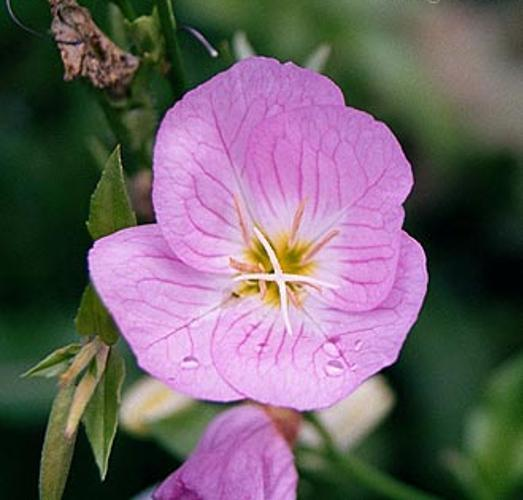

In [11]:
Image(filename=data_dir+training_dir+'1/image_06734.jpg') 